In [1]:
print("This is for Caitlín's rough code")

This is for Caitlín's rough code


In [1]:
#libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
os.chdir("..")
# Choose stations using K-means clustering 


In [3]:
#import data
os.chdir("..")
data = pd.read_csv("data/bikedata.csv")
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open


In [4]:
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,BIKE.USAGE
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open,0.7
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open,0.7
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open,0.7
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open,0.7
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open,0.7


In [5]:
bike_dates = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
print(bike_dates)

0         2018-08-01 12:30:02
1         2018-08-01 12:35:02
2         2018-08-01 12:40:02
3         2018-08-01 12:45:02
4         2018-08-01 12:50:02
                  ...        
1029255   2022-01-01 23:35:02
1029256   2022-01-01 23:40:02
1029257   2022-01-01 23:45:02
1029258   2022-01-01 23:50:02
1029259   2022-01-01 23:55:02
Name: TIME, Length: 1029260, dtype: datetime64[ns]


In [6]:
bike_dates.dt.date
date_vector = pd.DatetimeIndex(bike_dates.dt.date)
print(date_vector)

DatetimeIndex(['2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01',
               ...
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='TIME', length=1029260, freq=None)


In [ ]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
print(bike_dates)
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

In [56]:
#create masks
dataCP = data[data.NAME == "CHARLEMONT PLACE"]
dataSG = data[data.NAME == "ST. STEPHEN'S GREEN EAST"]
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]

In [57]:
dataPR.head

<bound method NDFrame.head of          Unnamed: 0                 TIME               NAME  BIKE.STANDS  \
276             277  2018-08-01 12:30:02  PHIBSBOROUGH ROAD           40   
277             278  2018-08-01 12:35:02  PHIBSBOROUGH ROAD           40   
278             279  2018-08-01 12:40:02  PHIBSBOROUGH ROAD           40   
279             280  2018-08-01 12:45:02  PHIBSBOROUGH ROAD           40   
280             281  2018-08-01 12:50:02  PHIBSBOROUGH ROAD           40   
...             ...                  ...                ...          ...   
1029255     1029256  2022-01-01 23:35:02  PHIBSBOROUGH ROAD           40   
1029256     1029257  2022-01-01 23:40:02  PHIBSBOROUGH ROAD           40   
1029257     1029258  2022-01-01 23:45:02  PHIBSBOROUGH ROAD           40   
1029258     1029259  2022-01-01 23:50:02  PHIBSBOROUGH ROAD           40   
1029259     1029260  2022-01-01 23:55:02  PHIBSBOROUGH ROAD           40   

         AVAILABLE.BIKE.STANDS  AVAILABLE.BIKES STATUS  B

In [ ]:
print(dataPR.DATE)

In [ ]:
PRdate_vector = pd.DatetimeIndex(dataPR.DATE.dt.date)
print(PRdate_vector)

In [ ]:
# Approach 3
idx_day_of_interest = 0;
Day_of_interest = PRdate_vector[idx_day_of_interest] # pearse_dates.dt.date.iloc[idx_day_of_interest]
Day_index = PRdate_vector == Day_of_interest
print(Day_of_interest)

dataPR[Day_index].head

In [ ]:
phibs_day_of_interest = dataPR.DATE[Day_index]
time = phibs_day_of_interest.dt.hour
stands = dataPR[Day_index]['AVAILABLE.BIKE.STANDS']
bikes = dataPR[Day_index]['AVAILABLE.BIKES']
bikes

In [ ]:
plt.figure()
plt.title(f'Usage of the Phibsborough Road station on the {Day_of_interest}')
plt.plot(time, stands,'k')
plt.xlabel('Hours of the day')
plt.ylabel('Available bike stands')
plt.title(f'Usage of the Phibsborough Road station on the {Day_of_interest}')

plt.figure()
plt.plot(time, bikes,'b')
plt.xlabel('Hours of the day')
plt.ylabel('Available bikes')
plt.show()

In [ ]:
# Group data by date and calculate mean bike usage
usage_by_date = dataPR.groupby('DATE')['BIKE.USAGE'].mean()

# Create a line plot
plt.plot(usage_by_date.index, usage_by_date.values)

# Set plot title and axis labels
plt.title('Average Bike Usage for Phibsborough Road')
plt.xlabel('Date')
plt.ylabel('Bike Usage')

# Show the plot
plt.show()

In [ ]:
CP_daily_avg = dataCP.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
CP_date_vector = pd.DatetimeIndex(dataCP["DATE"].dt.date)

PR_daily_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_date_vector = pd.DatetimeIndex(dataPR["DATE"].dt.date)

SG_daily_avg = dataSG.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
SG_date_vector = pd.DatetimeIndex(dataSG["DATE"].dt.date)

In [ ]:
#datavis
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.lineplot(ax=axes[0],x = CP_daily_avg.index, y = CP_daily_avg.values)
axes[0].set_title('Charlemont Place')
sns.lineplot(ax=axes[1],x = PR_daily_avg.index, y = PR_daily_avg.values)
axes[1].set_title('Phibsborough Road')
sns.lineplot(ax=axes[2],x = SG_daily_avg.index, y = SG_daily_avg.values)
axes[2].set_title("St. Stephen's Green East")


In [ ]:
CP_weekly_avg = dataCP.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_weekly_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
SG_weekly_avg = dataSG.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()


In [ ]:
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))

sns.barplot(ax=axes[0], x=CP_weekly_avg.index, y=CP_weekly_avg.values)
axes[0].set_title('Charlemont Place')

sns.barplot(ax=axes[1], x=PR_weekly_avg.index, y=PR_weekly_avg.values)
axes[1].set_title('Phibsborough Road')

sns.barplot(ax=axes[2], x=SG_weekly_avg.index, y=SG_weekly_avg.values)
axes[2].set_title("St. Stephen's Green East")

In [ ]:


# Filter data for year 2020
dataCP_2020 = dataCP[dataCP['TIME'].dt.year == 2020]
dataPR_2020 = dataPR[dataPR['TIME'].dt.year == 2020]
dataSG_2020 = dataSG[dataSG['TIME'].dt.year == 2020]

# Group data by week and calculate weekly average
CP_weekly_avg = dataCP_2020.groupby(pd.Grouper(key='TIME', freq='W'))['BIKE.USAGE'].mean()
PR_weekly_avg = dataPR_2020.groupby(pd.Grouper(key='TIME', freq='W'))['BIKE.USAGE'].mean()
SG_weekly_avg = dataSG_2020.groupby(pd.Grouper(key='TIME', freq='W'))['BIKE.USAGE'].mean()

# Create bar plot
fig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.barplot(ax=axes[0], x=CP_weekly_avg.index, y=CP_weekly_avg.values)
axes[0].set_title('Charlemont Place')
sns.barplot(ax=axes[1], x=PR_weekly_avg.index, y=PR_weekly_avg.values)
axes[1].set_title('Phibsborough Road')
sns.barplot(ax=axes[2], x=SG_weekly_avg.index, y=SG_weekly_avg.values)
axes[2].set_title("St. Stephen's Green East")

plt.show()

In [13]:
# Filter the data to include only the year 2020:
data_2020 = data[data['TIME'].str.startswith('2020')]

# Group the data by month and calculate the average bike usage for each month:
monthly_avg = data_2020.groupby(data_2020['TIME'].dt.strftime('%B'))['BIKE.USAGE'].mean()


AttributeError: Can only use .dt accessor with datetimelike values

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [38]:
df = pd.read_csv("data/stations.csv")
df.head()

,Unnamed: 0,NAME,LATITUDE,LONGITUDE,BIKE.STANDS
0,1,CLARENDON ROW,53.340927,-6.262501,31
1,2,BLESSINGTON STREET,53.356770,-6.268140,20
2,3,BOLTON STREET,53.351181,-6.269859,20
3,4,GREEK STREET,53.346874,-6.272976,20
4,5,CHARLEMONT PLACE,53.330662,-6.260177,40


[1 0 0 0 1 1 2 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 2 1 1 0
 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 1
 1 0]


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

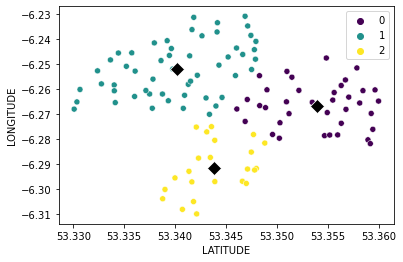

In [46]:
X = df[['LATITUDE', 'LONGITUDE']]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_std)

df['CLUSTER'] = kmeans.labels_

print(kmeans.labels_)

sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')

# Add the centroids to the plot as black diamonds
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],marker='D', s=100, color='black')


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

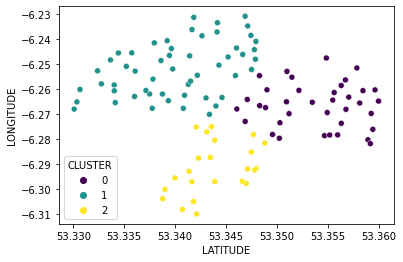

In [32]:
sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')



<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

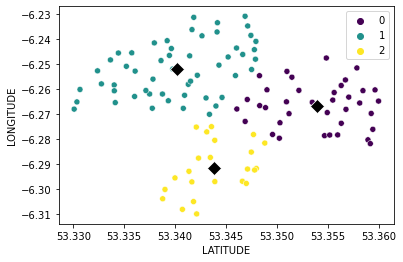

In [36]:

sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')


# Add the centroids to the plot as black diamonds
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],marker='D', s=100, color='black')


[[53.35604136 -6.27203773]
 [53.34108627 -6.24685977]
 [53.34365711 -6.29759778]]


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

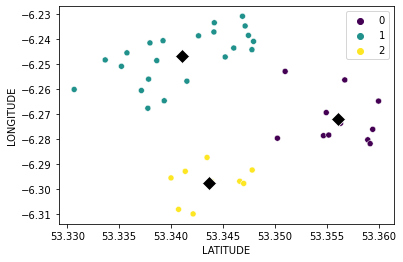

In [49]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load the dataset
df = pd.read_csv("data/stations.csv")

# Filter the dataframe to include only bike stands = 40
df = df[df['BIKE.STANDS'] == 40]

# Create a subset of the dataset containing only the latitude and longitude columns
X = df[['LATITUDE', 'LONGITUDE']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_std)

# Add the cluster labels to the dataframe
df['CLUSTER'] = kmeans.labels_

# Print the centroids of each cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(centroids)

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')

# Add the centroids to the plot as black diamonds
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],marker='D', s=100, color='black')


In [53]:
# Find the nearest point to each cluster
distances = cdist(X, centroids, 'euclidean')
nearest_centroid_indices = np.argpartition(distances, kth=range(3))[:, :3]

# Get the nearest point to each cluster
nearest_points = []
for i in range(kmeans.n_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    nearest_point_index = np.argmin(distances[cluster_indices, i])
    nearest_point = X.iloc[cluster_indices[nearest_point_index]]
    nearest_points.append(nearest_point)

# Print the nearest point to each cluster
print(nearest_points)

[LATITUDE     53.356308
LONGITUDE    -6.273717
Name: 107, dtype: float64, LATITUDE     53.338615
LONGITUDE    -6.248606
Name: 111, dtype: float64, LATITUDE     53.343899
LONGITUDE    -6.297060
Name: 93, dtype: float64]


In [3]:
#import data
data = pd.read_csv("data/bikedata.csv")
data.head

<bound method NDFrame.head of          Unnamed: 0                 TIME                  NAME  BIKE.STANDS  \
0                 1  2018-08-01 12:30:02        ROYAL HOSPITAL           40   
1                 2  2018-08-01 12:35:02        ROYAL HOSPITAL           40   
2                 3  2018-08-01 12:40:02        ROYAL HOSPITAL           40   
3                 4  2018-08-01 12:45:02        ROYAL HOSPITAL           40   
4                 5  2018-08-01 12:50:02        ROYAL HOSPITAL           40   
...             ...                  ...                   ...          ...   
1023656     1023657  2022-01-01 23:35:02  MERRION SQUARE SOUTH           40   
1023657     1023658  2022-01-01 23:40:02  MERRION SQUARE SOUTH           40   
1023658     1023659  2022-01-01 23:45:02  MERRION SQUARE SOUTH           40   
1023659     1023660  2022-01-01 23:50:02  MERRION SQUARE SOUTH           40   
1023660     1023661  2022-01-01 23:55:02  MERRION SQUARE SOUTH           40   

         AVAILABLE.BI

In [4]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,DATE,BIKE.USAGE
0,1,2018-08-01 12:30:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
1,2,2018-08-01 12:35:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
2,3,2018-08-01 12:40:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
3,4,2018-08-01 12:45:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
4,5,2018-08-01 12:50:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0


In [5]:
#create masks
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]
dataMS = data[data.NAME == "MERRION SQUARE SOUTH"]
dataRH = data[data.NAME == "ROYAL HOSPITAL"]


#Calculate weekly average usage
PR_weekly_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_date_vector = pd.DatetimeIndex(dataPR["DATE"].dt.date)

MS_weekly_avg = dataMS.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
MS_date_vector = pd.DatetimeIndex(dataMS["DATE"].dt.date)

RH_weekly_avg = dataRH.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
RH_date_vector = pd.DatetimeIndex(dataRH["DATE"].dt.date)

In [6]:
dataPR.head

<bound method NDFrame.head of          Unnamed: 0                TIME               NAME  BIKE.STANDS  \
138             139 2018-08-01 12:30:02  PHIBSBOROUGH ROAD           40   
139             140 2018-08-01 12:35:02  PHIBSBOROUGH ROAD           40   
140             141 2018-08-01 12:40:02  PHIBSBOROUGH ROAD           40   
141             142 2018-08-01 12:45:02  PHIBSBOROUGH ROAD           40   
142             143 2018-08-01 12:50:02  PHIBSBOROUGH ROAD           40   
...             ...                 ...                ...          ...   
1023368     1023369 2022-01-01 23:35:02  PHIBSBOROUGH ROAD           40   
1023369     1023370 2022-01-01 23:40:02  PHIBSBOROUGH ROAD           40   
1023370     1023371 2022-01-01 23:45:02  PHIBSBOROUGH ROAD           40   
1023371     1023372 2022-01-01 23:50:02  PHIBSBOROUGH ROAD           40   
1023372     1023373 2022-01-01 23:55:02  PHIBSBOROUGH ROAD           40   

         AVAILABLE.BIKE.STANDS  AVAILABLE.BIKES STATUS       DATE  BI

In [9]:
#Make it ready for regression, as a DataFrame
PR_weekly_avgVSTime = pd.DataFrame(dataPR, columns = ["PR_weekly_avg", "DATE"])

PR_weekly_avgVSTime

,PR_weekly_avg,DATE
138,NaN,2018-08-01
139,NaN,2018-08-01
140,NaN,2018-08-01
141,NaN,2018-08-01
142,NaN,2018-08-01
...,...,...
1023368,NaN,2022-01-01
1023369,NaN,2022-01-01
1023370,NaN,2022-01-01
1023371,NaN,2022-01-01


In [46]:
# Create a new DataFrame with weekly average usage and corresponding date
PR_weekly_avgVSTime = pd.DataFrame({'date': PR_weekly_avg.index, 'avg': PR_weekly_avg.values})
PR_weekly_avgVSTime

PR_weekly_avgVSTime.dropna()

AttributeError: 'SeriesGroupBy' object has no attribute 'index'

In [13]:
dictPR = {'date': PR_weekly_avg.index, 'avg': PR_weekly_avg.values}
regressionPR = pd.DataFrame(data=dictPR)
regressionPR.head()

regressionPR.dropna()

,date,avg
0,2018-08-05,0.541047
1,2018-08-12,0.779973
2,2018-08-19,0.650087
3,2018-08-26,0.861151
4,2018-09-02,0.812487


In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

In [33]:
#We split the data into a training and testing part 
#for both the 'Engine size' (as X) and the 'Price' (as y, our answers)
#With a randomisation of the dataset
BU_train, BU_test, date_train, date_test = train_test_split(PR_weekly_avgVSTime.avg, PR_weekly_avgVSTime.date, test_size=0.2, random_state=42)

In [34]:
#Adapting to array fromat (not important, formatting to adapt to a different library)
BU_train_arr = BU_train.array
BU_test_arr = BU_test.array
date_train_arr = date_train.array.to_numpy().reshape(-1,1)
date_test_arr = date_test.array.to_numpy().reshape(-1,1)

In [21]:
from sklearn.linear_model import LinearRegression
#Again scikit-learn library to help us

In [44]:
# Remove missing values
data = data.dropna()

#Linear regression
#Again store results (weights) in the 'reg' object
reg = LinearRegression().fit(date_train_arr,BU_train_arr)

#Predict price based on engine size
fitted_train_Price = reg.predict(date_train_arr)
fitted_test_Price = reg.predict(date_test_arr)

#Visualisation
# Seaborn library is used to easily visualise a dataset and its summarising models
import seaborn as sns
sns.regplot(x = PR_weekly_avgVSTime.date, y = PR_weekly_avgVSTime.avg)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [39]:
print(dataPR.isna().any().any())

print(dataPR.isna().sum())

False
Unnamed: 0               0
TIME                     0
NAME                     0
BIKE.STANDS              0
AVAILABLE.BIKE.STANDS    0
AVAILABLE.BIKES          0
STATUS                   0
DATE                     0
BIKE.USAGE               0
dtype: int64


In [40]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(PR_weekly_avg.values)

[0.54104651 0.77997272 0.65008681 0.86115117 0.81248745 0.59540302
 0.79420883 0.70612806 0.78840706 0.73873695 0.65875124 0.77793899
 0.84835069 0.72691286 0.78763764 0.83624253 0.57862103 0.78512407
 0.78214286 0.78613456 0.61613343 0.64047619 0.68146402 0.79728423
 0.71511657 0.82268105 0.82621528 0.68290323 0.78022592 0.81204117
 0.83387897 0.69834065 0.83941162 0.8624752  0.7698858  0.81626551
 0.75553075 0.7234623  0.82239583 0.80407986 0.83504464 0.78200645
 0.81585154 0.74396081 0.72917288 0.84723859        nan        nan
 0.69069479 0.77627728 0.71551339 0.78928571 0.72642609 0.84725942
 0.83251488 0.81744792 0.74201389 0.71923363 0.84322629 0.72902944
 0.79712302 0.83260634 0.81985367 0.6921999  0.81412072 0.75878848
 0.69973763 0.73220486 0.76644405 0.84053819 0.80634504 0.80640893
 0.85095041 0.82139228 0.78499581 0.8875     0.8468107  0.74287849
 0.85145788 0.83686756 0.76051587 0.77568204 0.68540427 0.82957589
 0.85750248 0.62336286 0.71468254 0.76431207 0.82263145 0.8613

In [43]:
#Calculate weekly average usage
PR_weekly_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE']
print(PR_weekly_avg)

In [47]:
dictRH = {'week': range(179), 'avg': RH_weekly_avg.values}
regressionRH = pd.DataFrame(data=dictRH)
regressionRH = regressionRH.dropna()

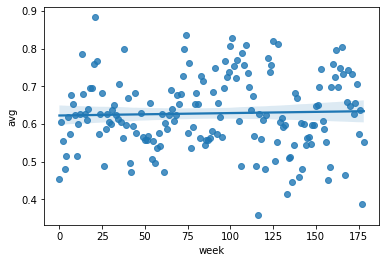

In [49]:
RHd_train, RHd_test, RHa_train, RHa_test = train_test_split(regressionRH.week, regressionRH.avg, test_size=0.2, random_state=42)

RHa_train_arr = RHa_train.array
RHa_test_arr = RHa_test.array
RHd_train_arr = RHd_train.array.to_numpy().reshape(-1,1)
RHd_test_arr = RHd_test.array.to_numpy().reshape(-1,1)


RHa_train_arr

RHreg = LinearRegression().fit(RHd_train_arr,RHa_train_arr)

fitted_RHtrain_avg = RHreg.predict(RHd_train_arr)
fitted_RHtest_avg = RHreg.predict(RHd_test_arr)

#Visualisation
# Seaborn library is used to easily visualise a dataset and its summarising models
sns.regplot(x=regressionRH.week,y= regressionRH.avg)
plt.show()


In [9]:
PR_weekly_avg

DATE
2018-08-05    0.541047
2018-08-12    0.779973
2018-08-19    0.650087
2018-08-26    0.861151
2018-09-02    0.812487
                ...   
2021-12-05    0.718457
2021-12-12    0.602294
2021-12-19    0.671639
2021-12-26    0.553646
2022-01-02    0.610619
Freq: W-SUN, Name: BIKE.USAGE, Length: 179, dtype: float64

In [17]:
# split the data into two parts based on the date
PRdata_pre_pandemic = PR_weekly_avg[PR_weekly_avg.index < '2020-03-15']
PRdata_post_pandemic = PR_weekly_avg[PR_weekly_avg.index >= '2020-03-15']

PRdata_post_pandemic

print(len(PRdata_pre_pandemic))
print(len(PRdata_post_pandemic))

84
95


In [21]:
# split the data into two parts based on the date
RHdata_pre_pandemic = RH_weekly_avg[RH_weekly_avg.index < '2020-03-15']
RHdata_post_pandemic = RH_weekly_avg[RH_weekly_avg.index >= '2020-03-15']

RHdata_post_pandemic

print(len(RHdata_pre_pandemic))
print(len(RHdata_post_pandemic))

84
95


In [20]:
# split the data into two parts based on the date
MSdata_pre_pandemic = MS_weekly_avg[MS_weekly_avg.index < '2020-03-15']
MSdata_post_pandemic = MS_weekly_avg[MS_weekly_avg.index >= '2020-03-15']

MSdata_post_pandemic

print(len(MSdata_pre_pandemic))
print(len(MSdata_post_pandemic))

81
95


In [ ]:
#####################################################################
#####################################################################
#####################################################################
#####################################################################
#####################################################################

# REGRESSIONS PRE AND POST PSANDEMIC

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

<AxesSubplot:xlabel='week', ylabel='avg'>

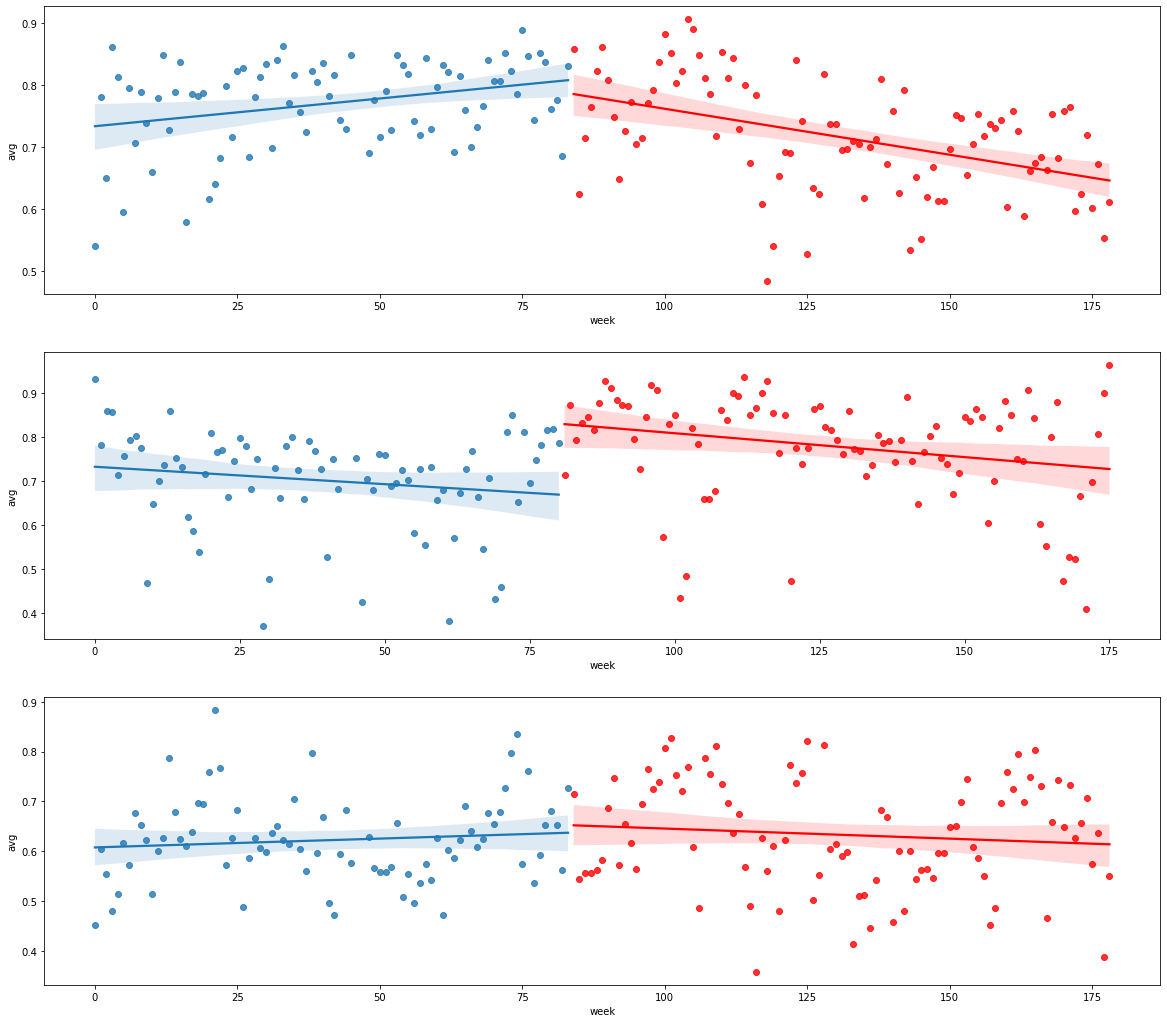

In [22]:
PRdata_pre_pandemic = PR_weekly_avg[PR_weekly_avg.index < '2020-03-15']
dictPRpre = {'week': range(84), 'avg': PRdata_pre_pandemic.values}
regressionPRpre = pd.DataFrame(data=dictPRpre)
regressionPRpre = regressionPRpre.dropna()
PRdata_post_pandemic = PR_weekly_avg[PR_weekly_avg.index >= '2020-03-15']
dictPRpost = {'week': range(84, 179), 'avg': PRdata_post_pandemic.values}
regressionPRpost = pd.DataFrame(data=dictPRpost)
regressionPRpost = regressionPRpost.dropna()



MSdata_pre_pandemic = MS_weekly_avg[MS_weekly_avg.index < '2020-03-15']
dictMSpre = {'week': range(81), 'avg': MSdata_pre_pandemic.values}
regressionMSpre = pd.DataFrame(data=dictMSpre)
regressionMSpre = regressionMSpre.dropna()
MSdata_post_pandemic = MS_weekly_avg[MS_weekly_avg.index >= '2020-03-15']
dictMSpost = {'week': range(81, 176), 'avg': MSdata_post_pandemic.values}
regressionMSpost = pd.DataFrame(data=dictMSpost)
regressionMSpost = regressionMSpost.dropna()


RHdata_pre_pandemic = RH_weekly_avg[RH_weekly_avg.index < '2020-03-15']
dictRHpre = {'week': range(84), 'avg': RHdata_pre_pandemic.values}
regressionRHpre = pd.DataFrame(data=dictRHpre)
regressionRHpre = regressionRHpre.dropna()
RHdata_post_pandemic = RH_weekly_avg[RH_weekly_avg.index >= '2020-03-15']
dictRHpost = {'week': range(84, 179), 'avg': RHdata_post_pandemic.values}
regressionRHpost = pd.DataFrame(data=dictRHpost)
regressionRHpost = regressionRHpost.dropna()

regFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.regplot(ax=axes[0], x=regressionPRpre.week,y= regressionPRpre.avg)
sns.regplot(ax=axes[0], x=regressionPRpost.week,y= regressionPRpost.avg, color = 'red')
sns.regplot(ax=axes[1], x=regressionMSpre.week,y= regressionMSpre.avg)
sns.regplot(ax=axes[1], x=regressionMSpost.week,y= regressionMSpost.avg, color = 'red')
sns.regplot(ax=axes[2], x=regressionRHpre.week,y= regressionRHpre.avg)
sns.regplot(ax=axes[2], x=regressionRHpost.week,y= regressionRHpost.avg, color = 'red')

64    64
58    58
40    40
9      9
80    80
      ..
20    20
62    62
73    73
14    14
53    53
Name: week, Length: 65, dtype: int64

In [107]:
# Pre pandemic Phibsborough Road 

preAvg_train, preAvg_test, preWeek_train, preWeek_test = train_test_split(regressionpre.avg, regressionpre.week, test_size=0.2, random_state=42)

preAvg_train_arr = preAvg_train.array
preAvg_test_arr = preAvg_test.array
preWeek_train_arr = preWeek_train.array.to_numpy().reshape(-1,1)
preWeek_test_arr = preWeek_test.array.to_numpy().reshape(-1,1)


preAvg_train_arr

preReg = LinearRegression().fit(preWeek_train_arr, preAvg_train_arr)

fitted_pre_train_avg = preReg.predict(preWeek_train_arr)
fitted_pre_test_avg = preReg.predict(preWeek_test_arr)


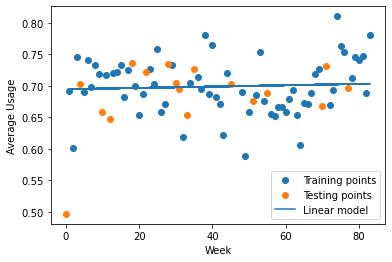

In [108]:
#Linear regression pre pan visualisation
plt.scatter(preWeek_train_arr, preAvg_train_arr, label='Training points')
plt.scatter(preWeek_test_arr, preAvg_test_arr, label='Testing points')
plt.plot(preWeek_train_arr, fitted_pre_train_avg, label='Linear model')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Average Usage')
plt.show()

In [127]:
print(np.mean(regressionpre.avg))

null_array = np.repeat(np.mean(regressionpre.avg), 17)

print(null_array)

0.6962185325996086
[0.69621853 0.69621853 0.69621853 0.69621853 0.69621853 0.69621853
 0.69621853 0.69621853 0.69621853 0.69621853 0.69621853 0.69621853
 0.69621853 0.69621853 0.69621853 0.69621853 0.69621853]


In [128]:
from sklearn.metrics import mean_squared_error

train_MSE = mean_squared_error(preAvg_train, fitted_pre_train_avg)
print('Mean Squared Error, training set:', train_MSE)

test_MSE = mean_squared_error(preAvg_test, fitted_pre_test_avg)
print('Mean Squared Error, testing set:', test_MSE)

null_MSE = mean_squared_error(preAvg_test, null_array)
print('Mean Squared Error, testing set:', null_MSE)


Mean Squared Error, training set: 0.0019378034109962016
Mean Squared Error, testing set: 0.003057541318645758
Mean Squared Error, testing set: 0.003093045856374302


In [33]:
# Post pandemic Phibsborough Road 

postPRavg_train, postPRavg_test, postPRweek_train, postPRweek_test = train_test_split(regressionPRpost.week, regressionPRpost.avg, test_size=0.2, random_state=42)

postPRavg_train_arr = postPRavg_train.array
postPRavg_test_arr = postPRavg_test.array
postPRweek_train_arr = postPRweek_train.array.to_numpy().reshape(-1,1)
postPRweek_test_arr = postPRweek_test.array.to_numpy().reshape(-1,1)


postPRavg_train_arr

postPRreg = LinearRegression().fit(postPRweek_train_arr, postPRavg_train_arr)

fitted_postPRtrain_avg = postPRreg.predict(postPRweek_train_arr)
fitted_postPRtest_avg = postPRreg.predict(postPRweek_test_arr)

MSE = mean_squared_error(postPRavg_train_arr, fitted_postPRtrain_avg)
print('Mean Squared Error, training set:', MSE)

MSE = mean_squared_error(postPRavg_test_arr, fitted_postPRtest_avg)
print('Mean Squared Error, testing set:', MSE)


Mean Squared Error, training set: 627.7677329080624
Mean Squared Error, testing set: 486.44719042294196


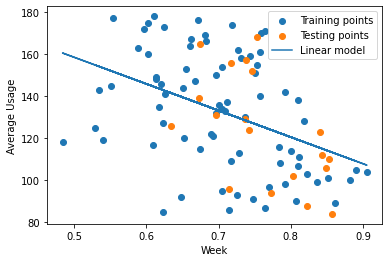

In [44]:

#Linear regression post pan visualisation
plt.scatter(postPRweek_train_arr, postPRavg_train_arr, label='Training points')
plt.scatter(postPRweek_test_arr, postPRavg_test_arr, label='Testing points')
plt.plot(postPRweek_train_arr, fitted_postPRtrain_avg, label='Linear model')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Average Usage')
plt.show()

In [41]:
# Pre pandemic Merrion Square

preMSavg_train, preMSavg_test, preMSweek_train, preMSweek_test = train_test_split(regressionMSpre.week, regressionMSpre.avg, test_size=0.2, random_state=42)

preMSavg_train_arr = preMSavg_train.array
preMSavg_test_arr = preMSavg_test.array
preMSweek_train_arr = preMSweek_train.array.to_numpy().reshape(-1,1)
preMSweek_test_arr = preMSweek_test.array.to_numpy().reshape(-1,1)


preMSavg_train_arr

preMSreg = LinearRegression().fit(preMSweek_train_arr, preMSavg_train_arr)

fitted_preMStrain_avg = preMSreg.predict(preMSweek_train_arr)
fitted_preMStest_avg = preMSreg.predict(preMSweek_test_arr)

MSE = mean_squared_error(preMSavg_train_arr, fitted_preMStrain_avg)
print('Mean Squared Error, training set:', MSE)

MSE = mean_squared_error(preMSavg_test_arr, fitted_preMStest_avg)
print('Mean Squared Error, testing set:', MSE)


Mean Squared Error, training set: 553.6723194394422
Mean Squared Error, testing set: 532.0890168123826


In [37]:
# Post pandemic Merrion Square

postMSavg_train, postMSavg_test, postMSweek_train, postMSweek_test = train_test_split(regressionMSpost.week, regressionMSpost.avg, test_size=0.2, random_state=42)

postMSavg_train_arr = postMSavg_train.array
postMSavg_test_arr = postMSavg_test.array
postMSweek_train_arr = postMSweek_train.array.to_numpy().reshape(-1,1)
postMSweek_test_arr = postMSweek_test.array.to_numpy().reshape(-1,1)


postMSavg_train_arr

postMSreg = LinearRegression().fit(postMSweek_train_arr, postMSavg_train_arr)

fitted_postMStrain_avg = postMSreg.predict(postMSweek_train_arr)
fitted_postMStest_avg = postMSreg.predict(postMSweek_test_arr)

MSE = mean_squared_error(postMSavg_train_arr, fitted_postMStrain_avg)
print('Mean Squared Error, training set:', MSE)

MSE = mean_squared_error(postMSavg_test_arr, fitted_postMStest_avg)
print('Mean Squared Error, testing set:', MSE)


Mean Squared Error, training set: 700.7281969083308
Mean Squared Error, testing set: 742.6926891471871


In [42]:
# Pre pandemic Royal Hospital

preRHavg_train, preRHavg_test, preRHweek_train, preRHweek_test = train_test_split(regressionRHpre.week, regressionRHpre.avg, test_size=0.2, random_state=42)

preRHavg_train_arr = preRHavg_train.array
preRHavg_test_arr = preRHavg_test.array
preRHweek_train_arr = preRHweek_train.array.to_numpy().reshape(-1,1)
preRHweek_test_arr = preRHweek_test.array.to_numpy().reshape(-1,1)


preRHavg_train_arr

preRHreg = LinearRegression().fit(preRHweek_train_arr, preRHavg_train_arr)

fitted_preRHtrain_avg = preRHreg.predict(preRHweek_train_arr)
fitted_preRHtest_avg = preRHreg.predict(preRHweek_test_arr)

MSE = mean_squared_error(preRHavg_train_arr, fitted_preRHtrain_avg)
print('Mean Squared Error, training set:', MSE)

MSE = mean_squared_error(preRHavg_test_arr, fitted_preRHtest_avg)
print('Mean Squared Error, testing set:', MSE)


Mean Squared Error, training set: 604.2433458316787
Mean Squared Error, testing set: 576.8098917201488


In [43]:
# Post pandemic Royal Hospital


postRHavg_train, postRHavg_test, postRHweek_train, postRHweek_test = train_test_split(regressionRHpost.week, regressionRHpost.avg, test_size=0.2, random_state=42)

postRHavg_train_arr = postRHavg_train.array
postRHavg_test_arr = postRHavg_test.array
postRHweek_train_arr = postRHweek_train.array.to_numpy().reshape(-1,1)
postRHweek_test_arr = postRHweek_test.array.to_numpy().reshape(-1,1)


postRHavg_train_arr

postRHreg = LinearRegression().fit(postRHweek_train_arr, postRHavg_train_arr)

fitted_postRHtrain_avg = postRHreg.predict(postRHweek_train_arr)
fitted_postRHtest_avg = postRHreg.predict(postRHweek_test_arr)

MSE = mean_squared_error(postRHavg_train_arr, fitted_postRHtrain_avg)
print('Mean Squared Error, training set:', MSE)

MSE = mean_squared_error(postRHavg_test_arr, fitted_postRHtest_avg)
print('Mean Squared Error, testing set:', MSE)


Mean Squared Error, training set: 752.3467082683765
Mean Squared Error, testing set: 724.0310840014215


In [ ]:
###################

In [55]:
data_pre_pandemic = weekly_avg[weekly_avg.index < '2020-03-15']
dict_pre = {'week': range(84), 'avg': data_pre_pandemic.values}
regression_pre = pd.DataFrame(data=dictPRpre)
regression_pre = regressionPRpre.dropna()
data_post_pandemic = weekly_avg[weekly_avg.index >= '2020-03-15']
dict_post = {'week': range(84, 179), 'avg': data_post_pandemic.values}
regression_post = pd.DataFrame(data=dict_post)
regression_post = regression_post.dropna()


NameError: name 'weekly_avg' is not defined

In [56]:
print(len(data_pre_pandemic))
print(len(data_post_pandemic))

NameError: name 'data_pre_pandemic' is not defined

In [59]:
############
weekly_avg = data.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
date_vector = pd.DatetimeIndex(data["DATE"].dt.date)


data_pre_pandemic = weekly_avg[weekly_avg.index < '2020-03-15']
print(len(data_pre_pandemic))
data_post_pandemic = weekly_avg[weekly_avg.index >= '2020-03-15']
print(len(data_post_pandemic))

84
95


In [60]:
data_pre_pandemic = weekly_avg[weekly_avg.index < '2020-03-15']
dictpre = {'week': range(84), 'avg': data_pre_pandemic.values}
regressionpre = pd.DataFrame(data=dictpre)
regressionpre = regressionpre.dropna()
data_post_pandemic = weekly_avg[weekly_avg.index >= '2020-03-15']
dictpost = {'week': range(84, 179), 'avg': data_post_pandemic.values}
regressionpost = pd.DataFrame(data=dictpost)
regressionpost = regressionpost.dropna()

<AxesSubplot:xlabel='week', ylabel='avg'>

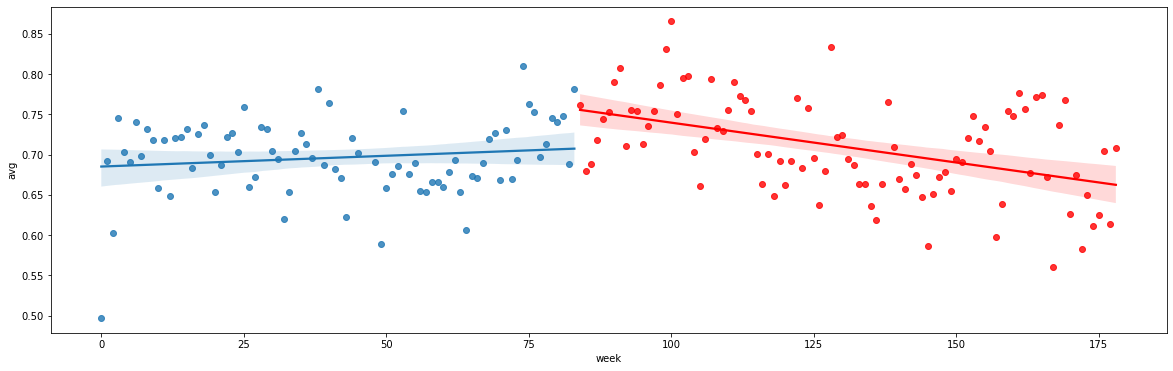

In [61]:
regFig, axes = plt.subplots(figsize=(20,6))
sns.regplot(x=regressionpre.week,y= regressionpre.avg)
sns.regplot(x=regressionpost.week,y= regressionpost.avg, color = 'red')

In [62]:
pre_slope = regressionpre.coef_[0]

print("Slope of the pre regression line: ", pre_slope)

post_slope = regressionpost.coef_[0]

print("Slope of the pre regression line: ", post_slope)

AttributeError: 'DataFrame' object has no attribute 'coef_'

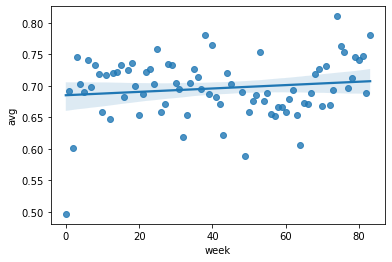

In [84]:
#We split the data into a training and testing part 
#for both the 'Engine size' (as X) and the 'Price' (as y, our answers)
#With a randomisation of the dataset
Avg_train, Avg_test, Week_train, Week_test = train_test_split(regressionpre.week, regressionpre.avg, test_size=0.2, random_state=42)


#Adapting to array fromat (not important, formatting to adapt to a different library)
Avg_train_arr = Avg_train.array
Avg_test_arr = Avg_test.array
Week_train_arr = Week_train.array.to_numpy().reshape(-1,1)
Week_test_arr = Week_test.array.to_numpy().reshape(-1,1)

#Linear regression
#Again store results (weights) in the 'reg' object
no_pandemic_reg = LinearRegression().fit(Week_train_arr, Avg_train_arr)

#Predict price based on engine size
fitted_train_Avg = no_pandemic_reg.predict(Week_train_arr)
fitted_test_Avg = no_pandemic_reg.predict(Week_test_arr)

#Visualisation
# Seaborn library is used to easily visualise a dataset and its summarising models
import seaborn as sns
sns.regplot(x=regressionpre.week, y = regressionpre.avg)
plt.show()

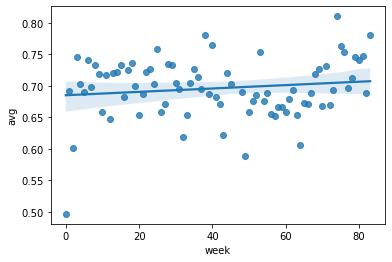

In [71]:
data_pre_pandemic = weekly_avg[weekly_avg.index < '2020-03-15']
print(len(data_pre_pandemic))
data_post_pandemic = weekly_avg[weekly_avg.index >= '2020-03-15']
print(len(data_post_pandemic))

84
95


In [69]:
data_pre_pandemic = weekly_avg[weekly_avg.index < '2020-03-15']
dictpre = {'week': range(84), 'avg': data_pre_pandemic.values}
regressionpre = pd.DataFrame(data=dictpre)
regressionpre = regressionpre.dropna()
data_post_pandemic = weekly_avg[weekly_avg.index >= '2020-03-15']
dictpost = {'week': range(84, 179), 'avg': data_post_pandemic.values}
regressionpost = pd.DataFrame(data=dictpost)
regressionpost = regressionpost.dropna()

In [72]:
preweek_arr = regressionpre.week.to_numpy().reshape(-1,1)
preavg_arr = regressionpre.avg.to_numpy().reshape(-1,1)
pre_reg = LinearRegression().fit(preweek_arr,preavg_arr)


print("Pre-Pandemic Intercept:", pre_reg.intercept_)
print("Pre-Pandemic Coefficient:", pre_reg.coef_[0])

postweek_arr = regressionpost.week.to_numpy().reshape(-1,1)
postavg_arr = regressionpost.avg.to_numpy().reshape(-1,1)
post_reg = LinearRegression().fit(postweek_arr,postavg_arr)


print("Post-Pandemic Intercept:", post_reg.intercept_)
print("Post-Pandemic Coefficient:", post_reg.coef_[0])

Pre-Pandemic Intercept: [0.68513153]
Pre-Pandemic Coefficient: [0.00026794]
Post-Pandemic Intercept: [0.8387338]
Post-Pandemic Coefficient: [-0.00099054]


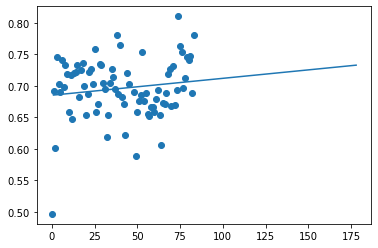

In [73]:

fc = np.array(range(1,179))
fc_pred = pre_reg.predict(fc.reshape(-1,1))

plt.plot(fc, fc_pred)
dictmain = {'week': range(179), 'avg': weekly_avg.values}
pred_df = pd.DataFrame(data=dictmain)
plt.scatter(regressionpre.week, regressionpre.avg)



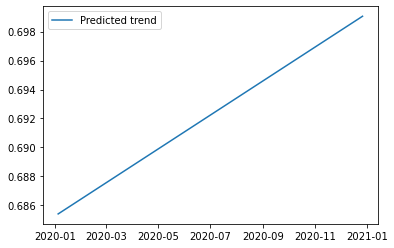

In [81]:
import pandas as pd

# Create a new dataframe with weekly dates for 2020
dates = pd.date_range(start='2020-01-01', end='2020-12-31', freq='W')
data_2020 = pd.DataFrame(index=dates)

# Add a new column with the week numbers
data_2020['week'] = range(1, 53)

# Predict the bike usage trend for the pre-pandemic period
preweek_arr = regressionpre.week.to_numpy().reshape(-1,1)
preavg_arr = regressionpre.avg.to_numpy().reshape(-1,1)
pre_reg = LinearRegression().fit(preweek_arr,preavg_arr)
pre_trend = pre_reg.predict(data_2020['week'].to_numpy().reshape(-1,1))


# Add the predicted trend to the dataframe and plot the results
data_2020['trend'] = pre_trend
plt.plot(data_2020.index, data_2020['trend'], label='Predicted trend')
plt.legend()
plt.show()


In [97]:
# Train a linear regression model on the training data
no_pandemic_reg = LinearRegression().fit(Week_train_arr, Avg_train_arr)

# Predict the average bike usage for the weeks in 2018
predicted_avg = no_pandemic_reg.predict(preweek_arr)

#Predict price based on engine size
fitted_train_Avg = no_pandemic_reg.predict(Week_train_arr)
fitted_test_Avg = no_pandemic_reg.predict(Week_test_arr)


# Calculate the residuals
residuals = preavg_arr - predicted_avg

# Calculate the standard deviation of the residuals
residual_std = np.std(residuals)

# Calculate the upper and lower confidence bounds for the predicted values
lower_bound = predicted_avg - 1.96 * residual_std
upper_bound = predicted_avg + 1.96 * residual_std



ValueError: 'x' is not 1-dimensional

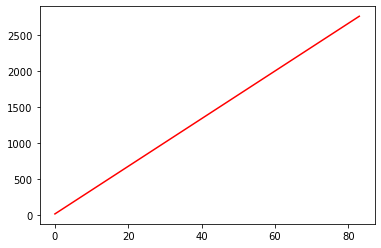

In [98]:
# Plot the predicted values and confidence bounds
plt.plot(preweek_arr, predicted_avg, color='red', label='Predicted values')
plt.fill_between(preweek_arr, lower_bound, upper_bound, alpha=0.2, color='blue', label='95% Confidence Intervals')
plt.legend()
plt.show()

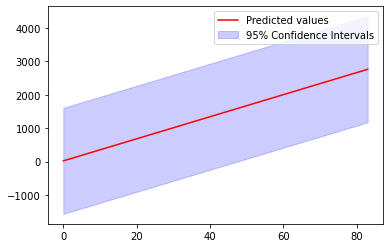

In [99]:
# Flatten the preweek_arr array
preweek_arr = preweek_arr.ravel()

# Calculate the upper and lower confidence bounds for the predicted values
lower_bound = predicted_avg - 1.96 * residual_std
upper_bound = predicted_avg + 1.96 * residual_std

# Plot the predicted values and confidence bounds
plt.plot(preweek_arr, predicted_avg, color='red', label='Predicted values')
plt.fill_between(preweek_arr, lower_bound, upper_bound, alpha=0.2, color='blue', label='95% Confidence Intervals')
plt.legend()
plt.show()